In [231]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import zscore
%matplotlib inline
from matplotlib import pyplot as plt

In [232]:
pdata = pd.read_csv("concrete.csv")

In [158]:
pdata.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


## Basic EDA

In [233]:
pdata.shape

(1030, 9)

In [234]:
pdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


### The dataframe has 1030 rows and 9 columns with 1 integer type and 8 float types.

In [37]:
pdata.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplastic,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseagg,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineagg,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


In [236]:
pdata.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

### - Though there are no NULL values, We see that for the columns slag,ash,superplastic we have multiple values as 0 which can be an error while collecting data as it does not make any sense for these values to be 0 as these variable are equally important in making of cement , so we will be replacing those values with corresponding median later.

In [31]:
pdata.median()

cement          272.900
slag             22.000
ash               0.000
water           185.000
superplastic      6.400
coarseagg       968.000
fineagg         779.500
age              28.000
strength         34.445
dtype: float64

In [8]:
pdata.std()

cement          104.506364
slag             86.279342
ash              63.997004
water            21.354219
superplastic      5.973841
coarseagg        77.753954
fineagg          80.175980
age              63.169912
strength         16.705742
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002243E9EBE08>,
      dtype=object)

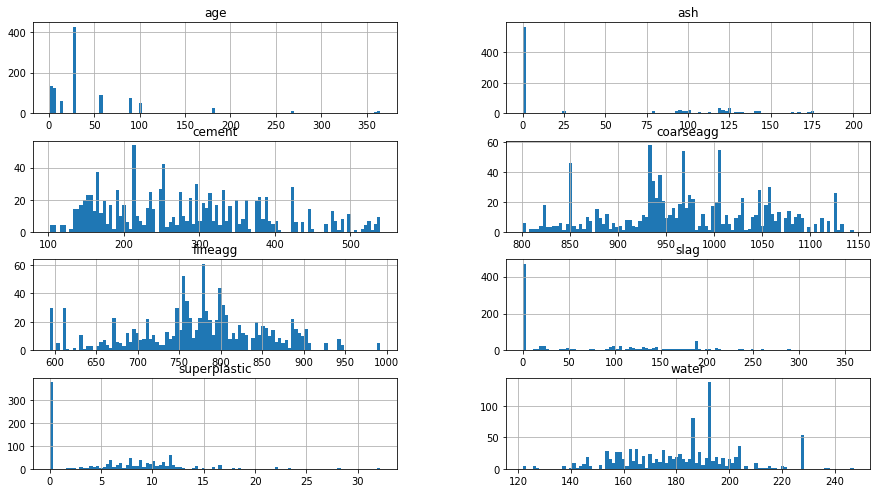

In [19]:
pdata1 = pdata.drop("strength",axis=1)
pdata1.hist(stacked=False, bins=100, figsize=(15,30), layout=(14,2))

### Most of the variables are skewed with outliers present.
### For variables like slag , superplastic,ash most of the value is 0.
### Features like fineagg,cement,coarseagg seems to normally distributed with few outliers present

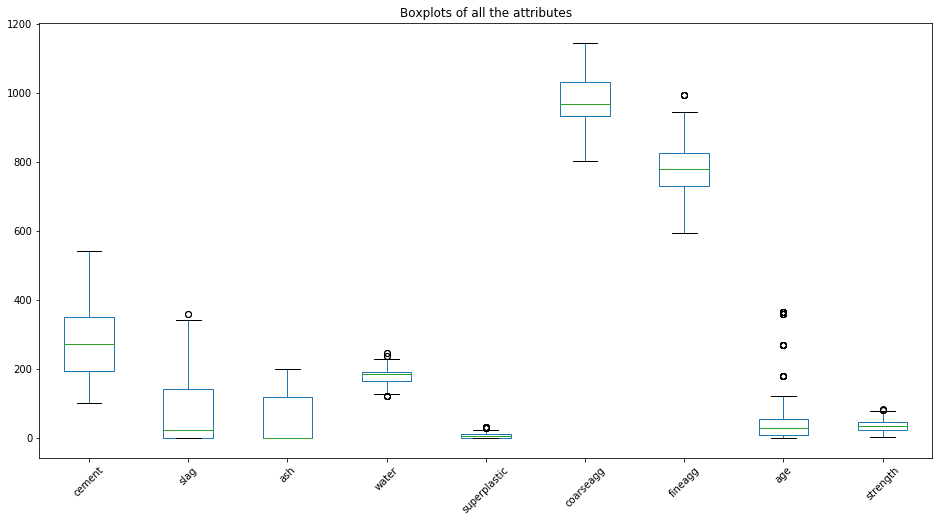

In [74]:
import matplotlib.pylab as plt
# Checking the data distributions of attributes using the entire dataframe

pdata.plot(kind = 'box', rot=45, figsize=(16,8), title = 'Boxplots of all the attributes')
plt.show()

### - There are some outliers present for columns slag,water,superplastic,fineagg,age and strength, which will be handled later.

### - Also features seems to be skewed in terms of distribution with slag,coarseagg left skewed while other columns such as water and age are rightly skewed.

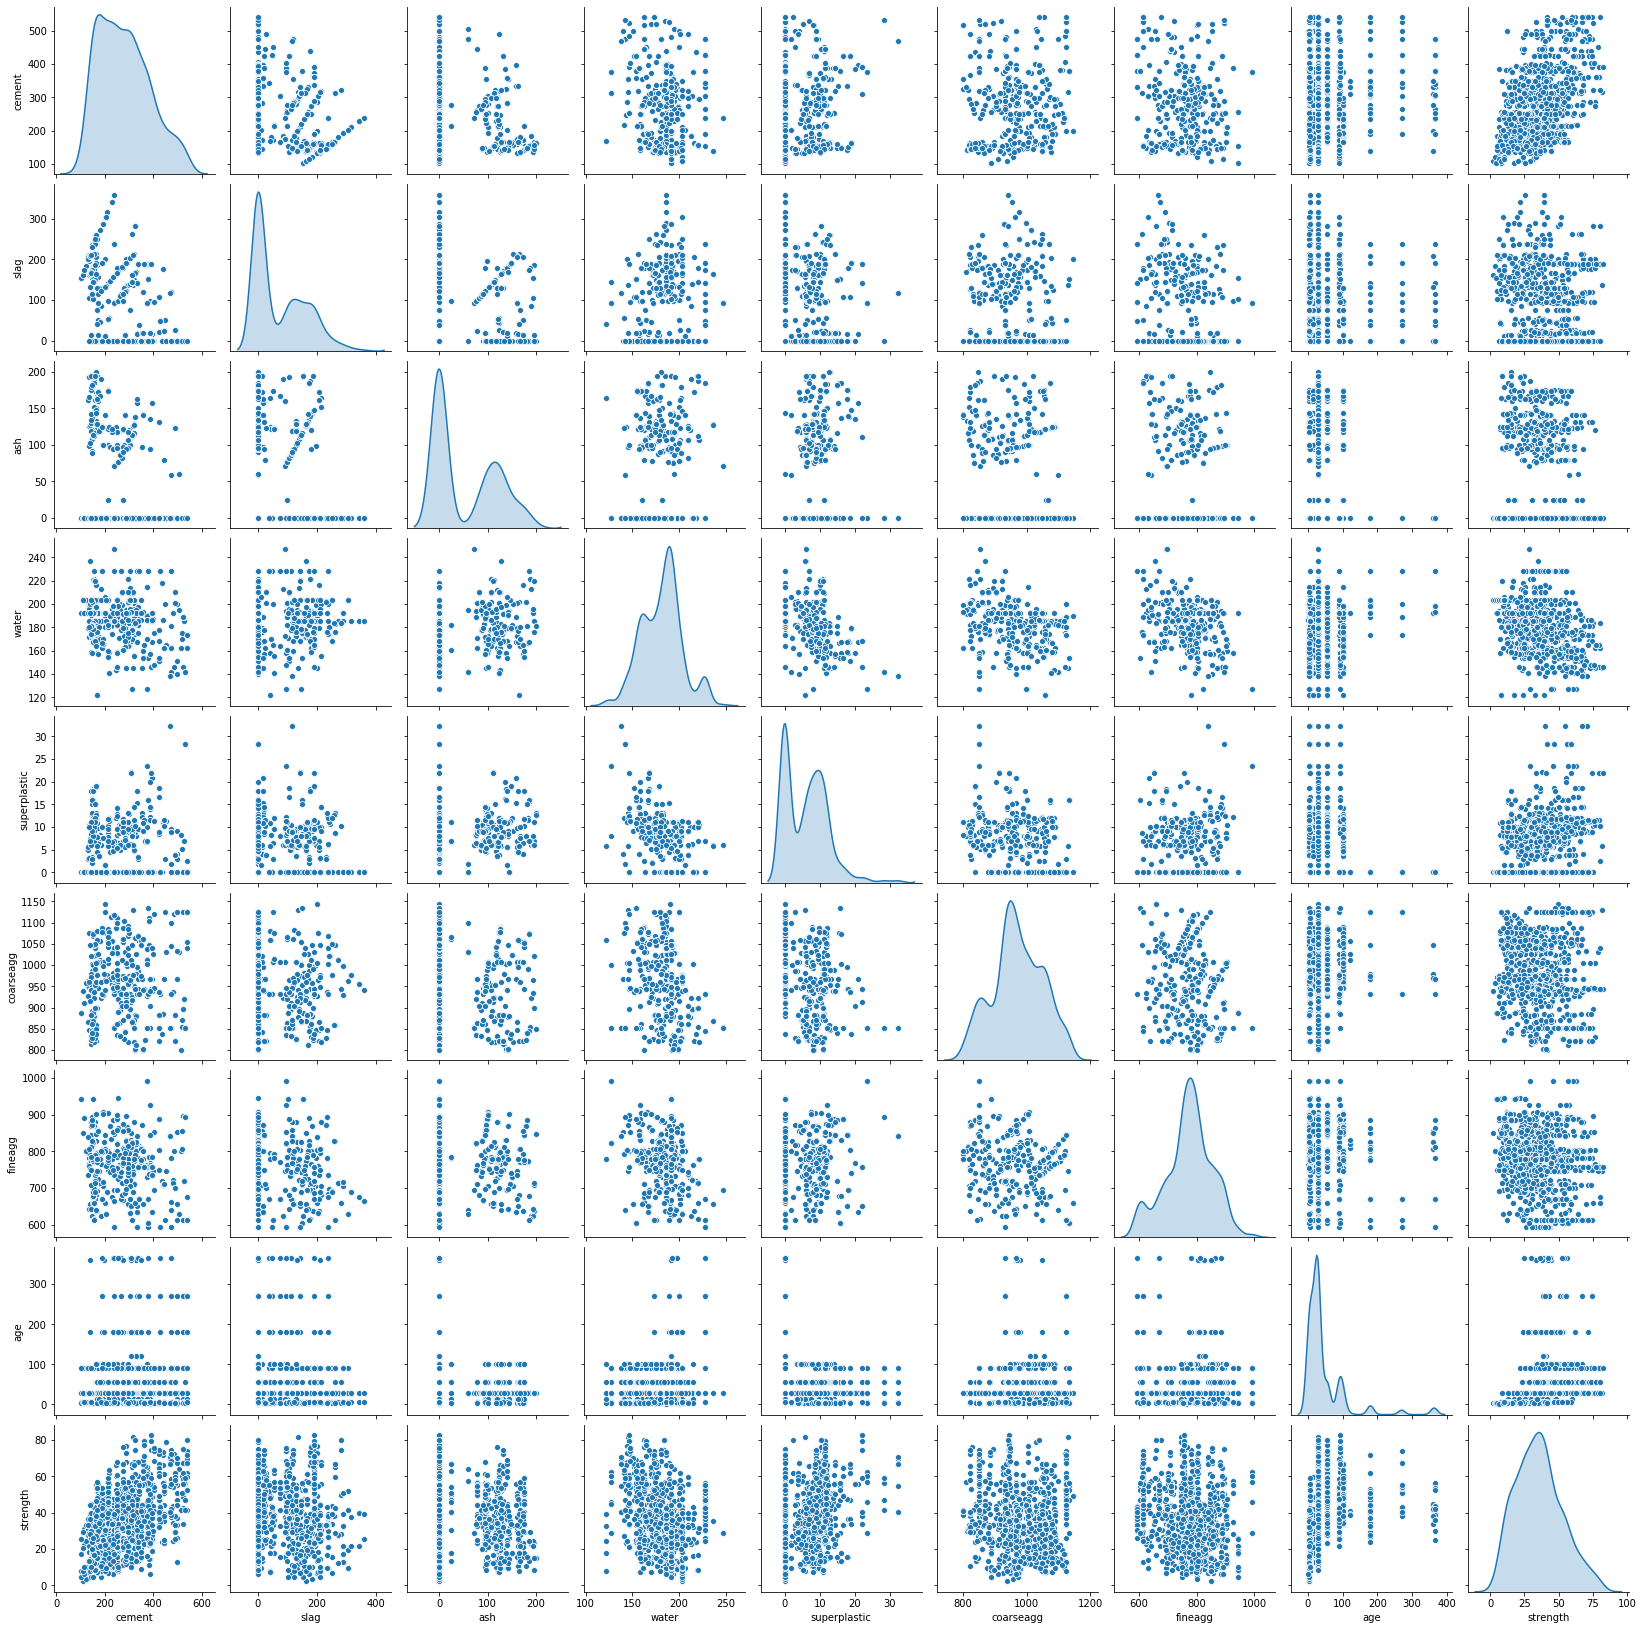

In [26]:
sns.pairplot(pdata,diag_kind='kde')

### - From above pairplot we can say that there are approx 3 to 6 clusters present in the data.
### - we do have some good amount of correlation between independent variable cement and target variable strength apart from this no other independent fetaure seems to have a good correlation with target variable strength.
### - Water and superplastic seems to have a pretty good correlation with each other.
### - The variables like slag,ash,coarseagg,fineagg form a cloud which means that they have very low correlation with the target variable so we an drop those variable.
### - There is no such thing called strong relationships between features here.

### - The appropriate attributes seems to have for this analysis is cement, water, superplastic, age and strength rest of the attributes can be dropped.

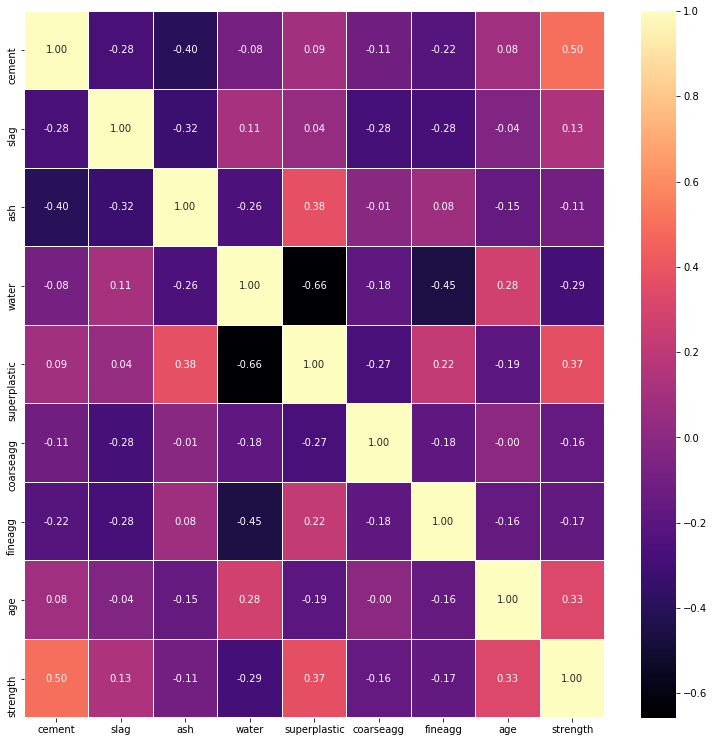

In [28]:
fig,ax = plt.subplots(figsize=(13, 13))   
sns.heatmap(pdata.corr(), ax=ax, annot=True, linewidths=0.08, fmt= '.2f',cmap="magma")

### - From above heatmap, as we discussed in pairplot diagram we do have some good amount of correlation between independent variable cement and target variable strength which is 0.5 apart from this no other independent fetaure seems to have a good correlation with target variable strength.
### - Water and superplastic seems to have a pretty good correlation(negative) -0.66 with each other.
### - There is no such thing called very strong relationships between features here.
### - The variables like slag,ash,coarseagg,fineagg have very low correlation with the target variable.

## Addressing the presence of outliers and missing values 

In [237]:
pdata = pdata.apply(lambda x: x.replace(0,x.median()),axis=0) 
pdata.head() # for ash the median is 0

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,6.4,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,22.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,6.4,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [238]:
pdata['ash'] = pdata['ash'].replace(0,pdata['ash'].mode()) #replacing 0 with mode as it is unaffected by outliers

In [239]:
pdata_copy = pdata.copy()
pdata_copy.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,6.4,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,22.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,6.4,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [240]:
#for outliers we will be replacing those values with 1.5*(IQR) as for variables like slag,water,superplastic and strength 
#the outliers are present near the whiskers while for age and fineagg we will replace the outliers with median values.


# Replace every outlier on the lower side by the lower whisker
columns_df = pdata_copy[['slag','water','superplastic','strength']]
Q1 = columns_df.quantile(0.25)
Q3 = columns_df.quantile(0.75)
IQR = Q3 - Q1


for i, j in zip(np.where(columns_df < Q1 - 1.5 * IQR)[0], np.where(columns_df < Q1 - 1.5 * IQR)[1]): 
    
    whisker  = Q1 - 1.5 * IQR
    columns_df.iloc[i,j] = whisker[j]
    
    
#Replace every outlier on the upper side by the upper whisker    
for i, j in zip(np.where(columns_df > Q3 + 1.5 * IQR)[0], np.where(columns_df > Q3 + 1.5 * IQR)[1]):
    
    whisker  = Q3 + 1.5 * IQR
    columns_df.iloc[i,j] = whisker[j]

C:\Users\kjaiswal02\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\kjaiswal02\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
C:\Users\kjaiswal02\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-c

In [241]:
#Replace every outlier on the upper side by median.This will create new some outliers but, we will ignore them
columns1_df = pdata_copy[['age','fineagg']]
Q1 = columns1_df.quantile(0.25)
Q3 = columns1_df.quantile(0.75)
IQR = Q3 - Q1
for i, j in zip(np.where(columns1_df > Q3 + 1.5 * IQR)[0], np.where(columns1_df > Q3 + 1.5 * IQR)[1]):# iterate using 2 variables.i for rows and j for columns
    columns1_df.iloc[i,j] = columns1_df.iloc[:,j].median()  # replace i,jth element with the median of j i.e, corresponding column


C:\Users\kjaiswal02\Anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
C:\Users\kjaiswal02\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


### - Box plot after dealing with outliers and missing values

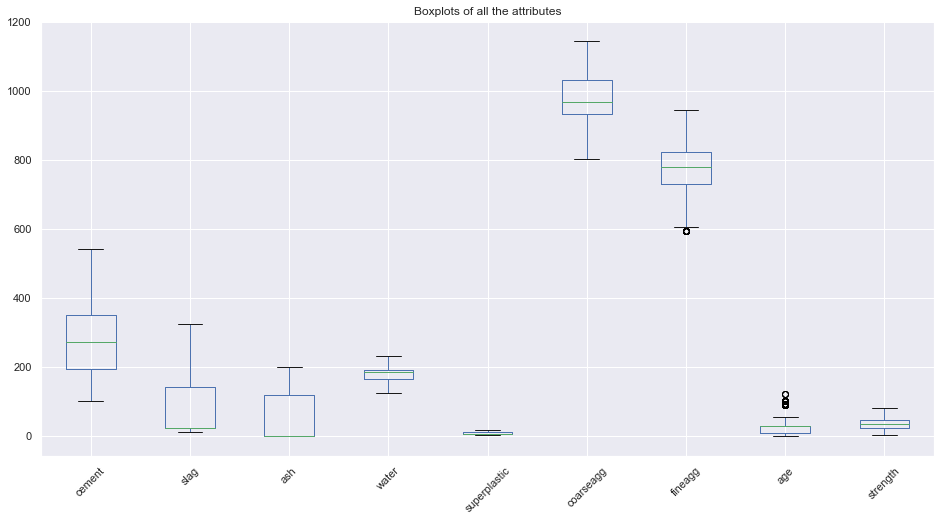

In [319]:
pdata_copy[['slag','water','superplastic','strength']] = columns_df[['slag','water','superplastic','strength']]
pdata_copy[['age','fineagg']] = columns1_df[['age','fineagg']]

pdata_copy.plot(kind = 'box', rot=45, figsize=(16,8), title = 'Boxplots of all the attributes')
plt.show()

In [243]:
from sklearn.model_selection import train_test_split 
from scipy.stats import zscore

X=pdata_copy.iloc[:,0:-1]
Y=pdata_copy.iloc[:,-1]
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=1)

'''To avoid data leakage, we will apply zscore on train set and test test separately'''

xScaled_train  = x_train.apply(zscore)
xScaled_test  = x_test.apply(zscore)
xScaled_train.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age
185,0.664379,-0.793781,-0.887574,1.028530,-0.629833,-0.006660,0.053278,-0.657797
286,0.892753,1.358988,-0.887574,-0.524897,0.620599,-0.629491,-0.179203,2.128844
600,-0.030256,-0.793781,-0.887574,0.461931,-0.629833,-0.084676,1.082295,-1.055889
691,0.949846,0.146124,-0.887574,2.208946,-0.629833,-0.552775,-2.246129,-0.911128
474,0.721473,-0.793781,1.326916,0.556364,0.924758,-2.256133,0.091390,-0.151135


## Fitting a SVM model on raw data(without dropping any variable)

In [244]:
from sklearn import svm
clr = svm.SVR()  
clr.fit(xScaled_train , y_train)
y_pred = clr.predict(xScaled_test)

C:\Users\kjaiswal02\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


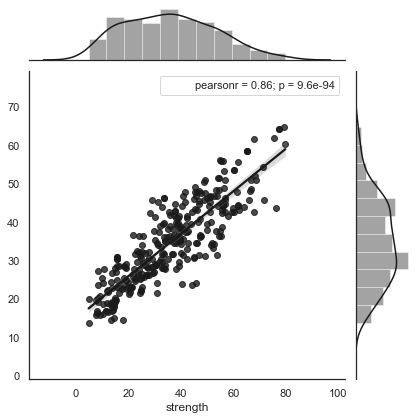

In [245]:
import scipy.stats as stats
sns.set(style="darkgrid", color_codes=True)
            
with sns.axes_style("white"):
    j=sns.jointplot(x=y_test, y=y_pred, kind="reg", color="k");
    j.annotate(stats.pearsonr)
    plt.show()


In [246]:
#dropping unnecessary variables and checking the score
cols_to_drop = [ "ash", "coarseagg" , "fineagg"]
xScaled_train_new = xScaled_train.drop(cols_to_drop,axis=1)
xScaled_test_new = xScaled_test.drop(cols_to_drop,axis=1)

In [247]:
clr1 = svm.SVR()  
clr1.fit(xScaled_train_new , y_train)
y_pred1 = clr1.predict(xScaled_test_new)

C:\Users\kjaiswal02\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


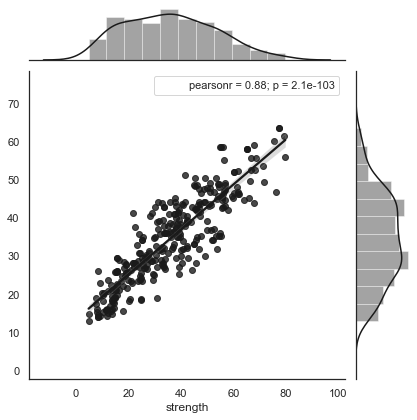

In [248]:
import scipy.stats as stats
sns.set(style="darkgrid", color_codes=True)

           
with sns.axes_style("white"):
    j=sns.jointplot(x=y_test, y=y_pred1, kind="reg", color="k");
    j.annotate(stats.pearsonr)
    plt.show()


### Achieved 88% on the test data whixh is more than 86% achieved on raw data. This shows that features "ash", "coarseagg" , "fineagg" are of no use and we can drop them
### The low score is due to the large spread and apparent mix of gaussians. Let us explore the data for hidden clusters

## using K menas Clustering to identify hidden clusters

In [174]:
from sklearn.cluster import KMeans

In [175]:
cluster_range = range( 2, 6 )   # expect 3 to 6 clusters from the pair panel visual inspection hence restricting from 2 to 6
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
  clusters.fit(pdata)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]

,num_clusters,cluster_errors
0,2,2.797838e+07
1,3,2.268072e+07
2,4,1.957798e+07
3,5,1.789112e+07


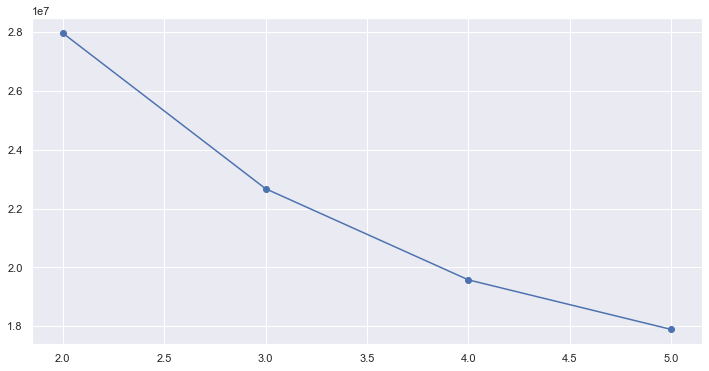

In [176]:
# Elbow plot

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [178]:
# The elbow plot confirms our visual analysis that there are likely 3 or 4 good clusters
# Let us start with 3 clusters

In [179]:
pdata_z = pdata.apply(zscore)

cluster = KMeans( n_clusters = 3, random_state = 2354 )
cluster.fit(pdata_z)

prediction=cluster.predict(pdata_z)
pdata_z["GROUP"] = prediction     # Creating a new column "GROUP" which will hold the cluster id of each record

pdata_z_copy = pdata_z.copy(deep = True)  # Creating a mirror copy for later re-use instead of building repeatedly

In [180]:
centroids = cluster.cluster_centers_
centroids

array([[ 0.06424747,  0.17356686, -0.62994578,  0.66673568, -0.48873441,
         0.11937337, -0.30135751,  0.18132192, -0.27749413],
       [ 0.98167749,  0.33842518, -0.42712599, -1.00429226,  1.17236471,
        -0.6778645 ,  0.29968634, -0.17982566,  1.14713358],
       [-0.67553175, -0.45752511,  1.18702686, -0.39557542,  0.03215759,
         0.22354807,  0.26996056, -0.16272094, -0.26632199]])

In [181]:
centroid_df = pd.DataFrame(centroids, columns = list(pdata) )
centroid_df

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,0.064247,0.173567,-0.629946,0.666736,-0.488734,0.119373,-0.301358,0.181322,-0.277494
1,0.981677,0.338425,-0.427126,-1.004292,1.172365,-0.677865,0.299686,-0.179826,1.147134
2,-0.675532,-0.457525,1.187027,-0.395575,0.032158,0.223548,0.269961,-0.162721,-0.266322


In [182]:
## Instead of interpreting the neumerical values of the centroids, let us do a visual analysis by converting the 
## centroids and the data in the cluster into box plots.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002244C369048>,
      dtype=object)

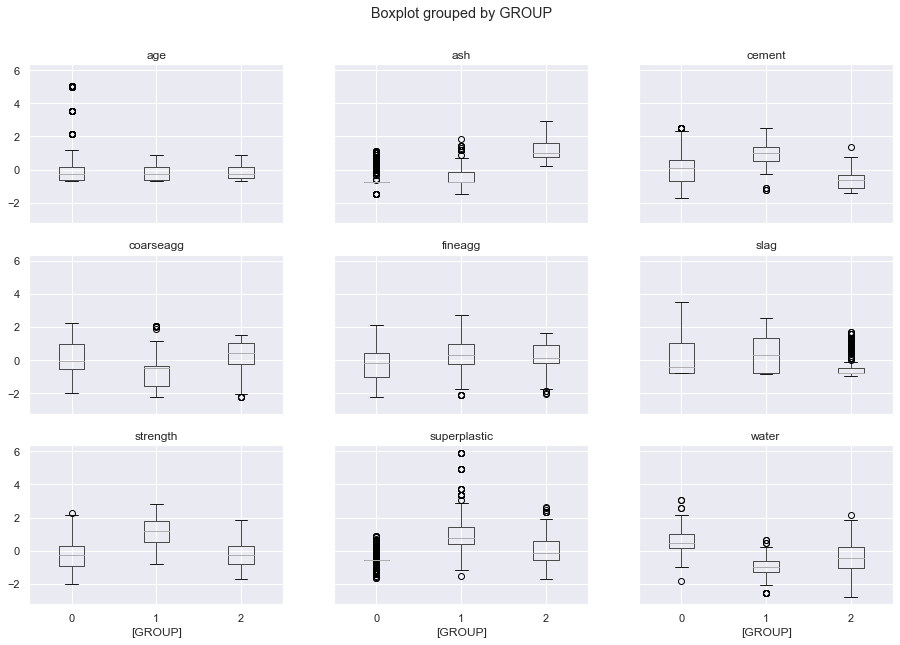

In [185]:
import matplotlib.pylab as plt

pdata_z.boxplot(by = 'GROUP',  layout=(3,3), figsize=(15, 10))



In [186]:
# There are many outliers on each dimension  (indicated by the black circles)
# Spread of data on each dimension (indivated by the whiskers is long ... due to the outliers)
# If the outliers are addressed, the clusters will overlap much less than right now


## Identifying and handling outliers

In [188]:
# Addressing outliers at group level

data = pdata_z
       
def replace(group):
    median, std = group.median(), group.std()  #Get the median and the standard deviation of every group 
    outliers = (group - median).abs() > 2*std # Subtract median from every member of each group. Take absolute values > 2std
    group[outliers] = group.median()       
    return group

data_corrected = (data.groupby('GROUP').transform(replace)) 
concat_data = data_corrected.join(pd.DataFrame(pdata_z['GROUP']))


C:\Users\kjaiswal02\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022447B0DC88>,
      dtype=object)

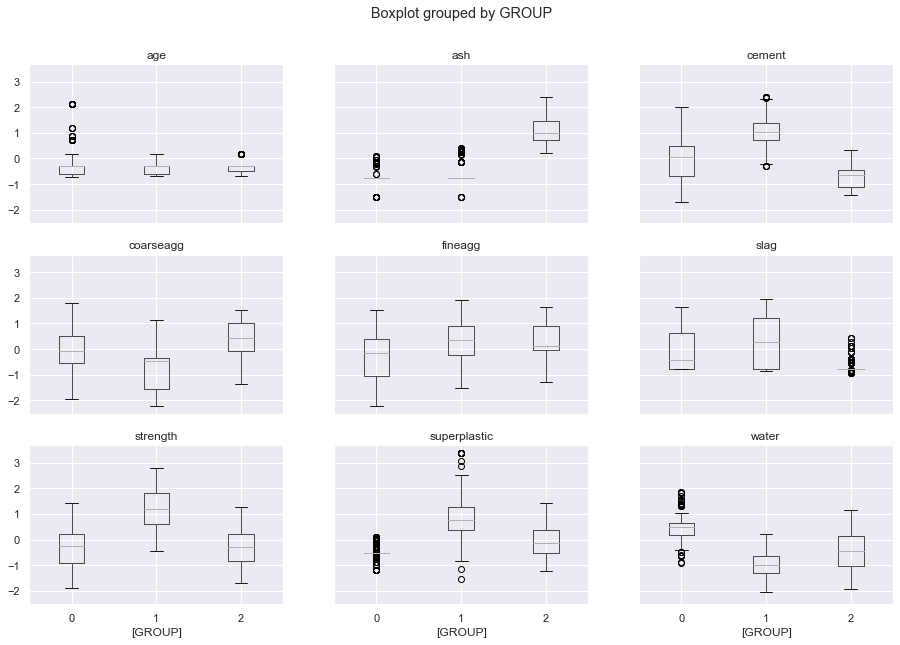

In [189]:
concat_data.boxplot(by = 'GROUP', layout=(3,3), figsize=(15, 10))

### Note: When we remove outliers and replace with median or mean, the distribution shape changes, the standard deviation becomes tighter creating new outliers. The new outliers would be much closer to the centre than original outliers so we accept them without modifying them

# Let us analyze the strength column vs other columns group wise. 

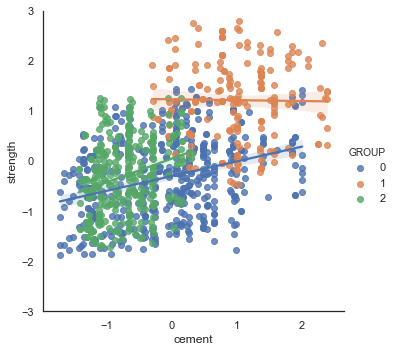

In [191]:
# cement Vs strength

var = 'cement'

with sns.axes_style("white"):
    plot = sns.lmplot(var,'strength',data=concat_data,hue='GROUP')
plot.set(ylim = (-3,3))

### For this plot its clearly visible that cement is a very week predictor for strength for cluster 1(orange one as the best fit line is straight)

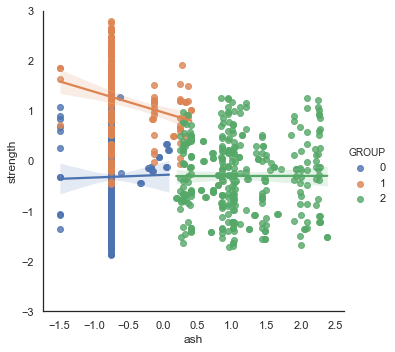

In [192]:
# ash Vs strength

var = 'ash'

with sns.axes_style("white"):
    plot = sns.lmplot(var,'strength',data=concat_data,hue='GROUP')
plot.set(ylim = (-3,3))

### For this plot its clearly visible that 'ash' is a very week predictor for strength for cluster 0 and 2 and 1 so dropping this variable makes sense

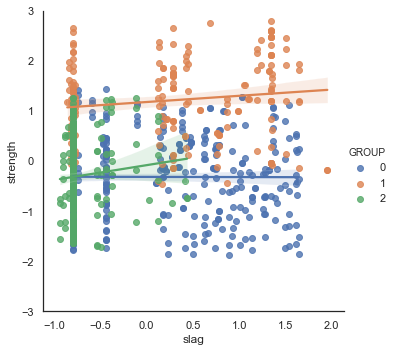

In [193]:
# slag Vs strength

var = 'slag'

with sns.axes_style("white"):
    plot = sns.lmplot(var,'strength',data=concat_data,hue='GROUP')
plot.set(ylim = (-3,3))

### slag is good predictor for cluster 2 but not for cluster 0 and 1

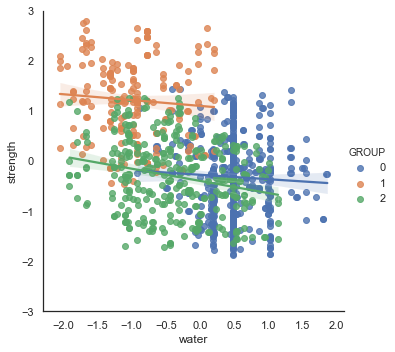

In [194]:
# water Vs strength

var = 'water'

with sns.axes_style("white"):
    plot = sns.lmplot(var,'strength',data=concat_data,hue='GROUP')
plot.set(ylim = (-3,3))

### Water is a not good predictor in all the clusters

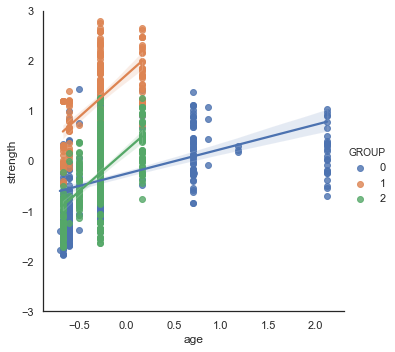

In [195]:
# age Vs strength

var = 'age'

with sns.axes_style("white"):
    plot = sns.lmplot(var,'strength',data=concat_data,hue='GROUP')
plot.set(ylim = (-3,3))

### age is a good predictor in all the clusters

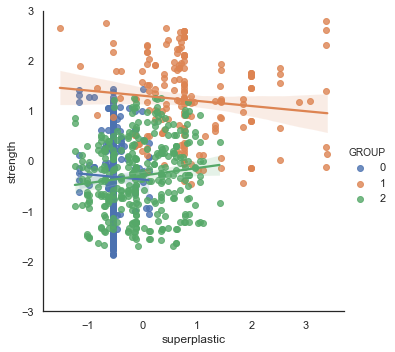

In [200]:
# superplastic Vs strength

var = 'superplastic'

with sns.axes_style("white"):
    plot = sns.lmplot(var,'strength',data=concat_data,hue='GROUP')
plot.set(ylim = (-3,3))

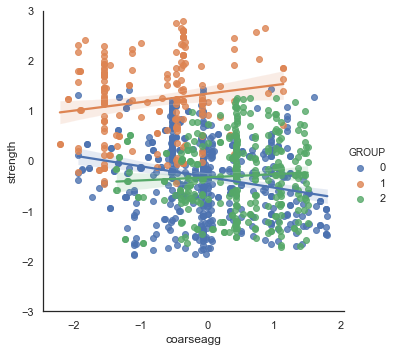

In [199]:
# coarseagg Vs strength

var = 'coarseagg'

with sns.axes_style("white"):
    plot = sns.lmplot(var,'strength',data=concat_data,hue='GROUP')
plot.set(ylim = (-3,3))

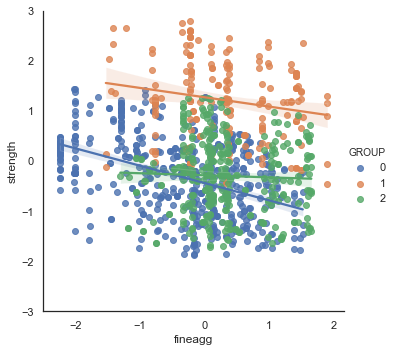

In [198]:
# fineagg Vs strength

var = 'fineagg'

with sns.axes_style("white"):
    plot = sns.lmplot(var,'strength',data=concat_data,hue='GROUP')
plot.set(ylim = (-3,3))

## Now that we see that the role of independent features in predicting strength of cement is different in different clusters and there is alot of variance in the data, building a single linear model or svm model for all the clusters is not a good idea.

In [ ]:
 '''feature importance for the individual features'''

In [204]:
from sklearn.tree import DecisionTreeRegressor

In [249]:
regressor = DecisionTreeRegressor(random_state=0,max_depth=4)
regressor.fit(x_train,y_train)
feature_importances = regressor.feature_importances_

feature_names = pdata.columns[0:8]
print(feature_names)

k = 8
print(feature_importances)

top_k_idx = (feature_importances.argsort()[-k:][::-1])

print(feature_names[top_k_idx],feature_importances)

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age'],
      dtype='object')
[0.41726847 0.04225447 0.         0.13167442 0.00434206 0.
 0.         0.40446057]
Index(['cement', 'age', 'water', 'slag', 'superplastic', 'fineagg',
       'coarseagg', 'ash'],
      dtype='object') [0.41726847 0.04225447 0.         0.13167442 0.00434206 0.
 0.         0.40446057]


### Its clearly visible that cement,slag,water,superplastic,age features are of importance while predicting the target variable with cement and age being high importance

### The model didnt use ash,coarseagg,fineagg features as feature importance being 0, so dropping these variables before while creating SVR model was the right decision.

In [215]:
y_predt = regressor.predict(x_test)

C:\Users\kjaiswal02\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


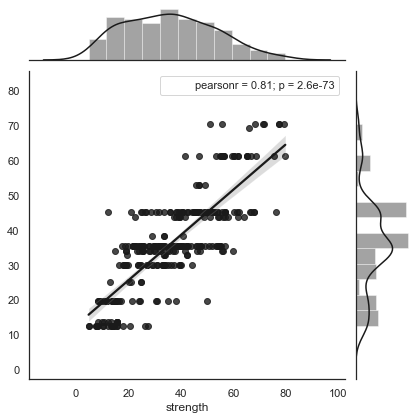

In [216]:
import scipy.stats as stats
sns.set(style="darkgrid", color_codes=True)
            
with sns.axes_style("white"):
    j=sns.jointplot(x=y_test, y=y_predt, kind="reg", color="k");
    j.annotate(stats.pearsonr)
    plt.show()

### with decision tree we achieved a score of 81% 

In [250]:
'''lets drop the less important variables and check the score'''

X=pdata_copy.drop(["ash", "coarseagg" , "fineagg","strength"],axis=1)
Y=pdata_copy['strength']
x_traint,x_testt,y_traint,y_testt = train_test_split(X,Y,test_size=0.3,random_state=1)

regressor.fit(x_traint,y_traint)
y_predt1 = regressor.predict(x_testt)
regressor.feature_importances_

print(pd.DataFrame(regressor.feature_importances_ , columns =["Imp"],index = x_traint.columns))

                   Imp
cement        0.417268
slag          0.042254
water         0.131674
superplastic  0.004342
age           0.404461


C:\Users\kjaiswal02\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


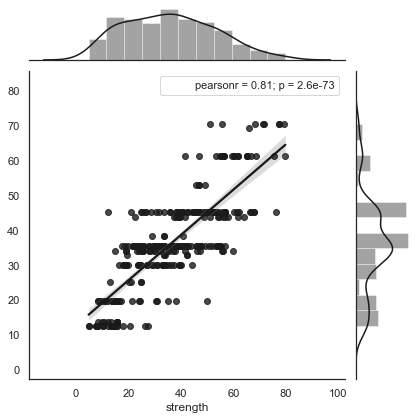

In [251]:
import scipy.stats as stats
sns.set(style="darkgrid", color_codes=True)
            
with sns.axes_style("white"):
    j=sns.jointplot(x=y_testt, y=y_predt1, kind="reg", color="k");
    j.annotate(stats.pearsonr)
    plt.show()

### So even after dropping the variables we are hovering around a score of 81 to 88%. lets try regularized linear regression using ride or lasso and see if the performance improves!

## fit a simple linear model

In [274]:
# Copy all the predictor variables into X dataframe. Since 'mpg' is dependent variable drop it
X = pdata.drop('strength', axis=1)

# Copy the 'mpg' column alone into the y dataframe. This is the dependent variable
y = pdata[['strength']]

In [275]:
from sklearn import preprocessing


X_scaled = preprocessing.scale(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)  
y_scaled = preprocessing.scale(y)
y_scaled = pd.DataFrame(y_scaled, columns=y.columns)  

In [277]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.30, random_state=1)
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for cement is 0.7718259957358147
The coefficient for slag is 0.528699868703426
The coefficient for ash is 0.352677944897533
The coefficient for water is -0.3019919853342466
The coefficient for superplastic is -0.04497109825269925
The coefficient for coarseagg is -0.0019508822228941482
The coefficient for fineagg is 0.10183976947699756
The coefficient for age is 0.42504592898535465


### Create a regularized RIDGE model and note the coefficients

In [280]:
ridge = Ridge(alpha=.3)
ridge.fit(X_train,y_train)
print ("Ridge model:", (ridge.coef_))

Ridge model: [[ 0.76760587  0.52460176  0.34891486 -0.30450741 -0.04491251 -0.00456564
   0.0983676   0.42457949]]


### Create a regularized LASSO model and note the coefficients

In [281]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train,y_train)
print ("Lasso model:", (lasso.coef_))

# two of the coefficients have become 0 indicating drop of those dimensions from the model

Lasso model: [ 0.40111891  0.14698474  0.         -0.24603425  0.00457245 -0.0369385
 -0.          0.25181764]


Let us compare their scores

In [282]:
print(regression_model.score(X_train, y_train))
print(regression_model.score(X_test, y_test))

0.5951966942283955
0.637641279406743


In [283]:
print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))

0.5951939518796847
0.6377360434175984


In [284]:
print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))

0.4938293330069086
0.48628886336362737


### The scores are pretty bad with simple linear model even after regularizing it

### Let us generate polynomial models reflecting the non-linear interaction between some dimensions

In [291]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 3, interaction_only=True)

x_scaled = pd.concat([xScaled_train,xScaled_test],axis=0)
#poly = PolynomialFeatures(2)
X_poly = poly.fit_transform(X_scaled)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.30, random_state=1)
X_train.shape

(721, 93)

In [292]:
# fit a simple non regularized linear model on poly features-
regression_model.fit(X_train, y_train)
print(regression_model.coef_[0])

[-3.11239883e-15  1.05638742e+01  9.02136267e+00  8.64238311e+00
 -5.28106463e+00  1.35030451e+00 -1.97889530e+00 -8.85828244e-01
  1.87362192e+01  2.79670323e-01  2.38251109e+00 -1.14364642e+00
 -4.46450274e+00 -8.72255731e-01  2.08170519e+00 -6.10497138e+00
  3.47797879e+00 -8.64151322e-01 -5.90292327e+00 -1.38187181e+00
  1.92247265e+00 -2.25985415e+00  2.69511326e+00 -3.62711970e+00
  6.49333180e-01  4.13582282e+00  3.36691749e+00 -2.69213465e+00
 -2.91872425e+00 -1.12801866e-01 -8.65429463e+00 -3.57462058e+00
 -3.84099157e+00  5.16307703e+00  1.02276236e+00 -8.67183604e+00
 -8.64234263e+00  2.80458472e-01 -1.88503142e-01 -1.59725060e+00
 -1.09820369e+00 -3.24011620e-01 -3.20268824e+00  1.69196334e+00
  6.79803106e-01  9.61896906e-01  6.63823017e-01  2.96353543e+00
  1.50839005e+00  8.55961119e-01  1.45578933e+00 -2.75142555e+00
  4.14168796e-01  2.38060494e+00 -9.51879728e+00  1.30230314e+00
 -2.47115988e+00  7.91207402e-01  3.52721118e+00 -9.24835016e-01
  2.77726782e+00  3.29708

In [293]:
ridge = Ridge(alpha=.3)
ridge.fit(X_train,y_train)
print ("Ridge model:", (ridge.coef_))

Ridge model: [[ 0.         10.92026086  9.24870019  8.79663291 -5.01939761  0.80428073
  -1.50983978 -0.43664567 17.24583085  0.09154223  2.149663   -1.06151032
  -2.49002683 -0.96344396  2.022368   -3.10807823  3.19305372 -0.81555914
  -3.98668947 -1.47347142  1.82716063  0.43982035  2.61634991 -2.17511678
   0.46780022  3.98031687  5.94152532 -1.93348118 -2.98734855 -0.02073412
  -7.08886548 -2.04460006 -2.08176968  2.94993529  1.02195335 -6.25801361
  -6.09725747  0.0564183  -0.23740335 -1.47741159 -1.21929766 -0.42607836
  -3.15509573  1.64514377  0.67356787  0.8477888   0.5518884   2.87124782
   1.34757402  0.83609803  1.46918654 -2.31703008  0.34195759  2.39525275
  -3.44406117  1.23406362 -2.4962339   0.7774712   3.32528611 -0.96044192
   2.65558834  3.14307818 -1.67144952 -1.25564092 -0.3624715   3.55662223
  -9.40654976 -1.56132588  1.56575495 -6.71917332  2.17860575 -7.24511074
  -3.54894619  0.46310016  3.66043945  2.22396647 -0.88001724  0.15232796
   0.78836285 -0.54826374

In [294]:
print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))

0.8104303310974584
0.7154700092057359


In [ ]:
lasso = Lasso(alpha=0.01)
lasso.fit(X_train,y_train)
print ("Lasso model:", (lasso.coef_))

In [296]:
print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))

0.8088239880351017
0.7293948852066441


### We can clearly see that building a  polynomial model of higher degree 3  improve the score a little bit but not satisfactorily.


# Suitable algorithm for this project

## Based on above score with SVR, decision tree,linear/poly regression with regularized form ridge and lasso among all these the highest score that is achieved is with SVR with an score of 88% after dropping the "no use features"

## Model Tuning with K-fold Cross Validation

In [297]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [303]:

X=pdata_copy.drop(["ash", "coarseagg" , "fineagg","strength"],axis=1)
Y=pdata_copy['strength']

xScaled  = X.apply(zscore) #-scaling the data as well because the features are in different units and we will be using these scaled data for models like SVM and clustering

In [318]:
x_scaled_new = pd.concat([xScaled_train_new,xScaled_test_new],axis=0)
kfold = KFold(n_splits=20, random_state=1) #taking number of kfolds as 10
model = svm.SVR(gamma=0.1, C=15)
results = cross_val_score(model, xScaled, Y, cv=kfold)
print(results)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

C:\Users\kjaiswal02\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


[0.76728396 0.76398567 0.81559353 0.82964783 0.90208657 0.79532364
 0.80672037 0.77136072 0.88684994 0.80073243 0.8513358  0.84040211
 0.85105059 0.83316726 0.87259149 0.75405138 0.86687421 0.8069298
 0.8339461  0.80181625]
Accuracy: 82.259% (4.072%)


### After model tuning and playing with hyperparameters we arrive at an average score 82% with a standard deviation of approx 4 % , So with 95% confidence interval we can say that this model in production will have accuracy in the range of 78% to 86%